<a href="https://colab.research.google.com/github/meghanasanisetty/VOIS_AICTE_Oct2025_SANISETTY_SRI_MEGHANA/blob/main/Airbnb_Hotel_Booking_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [9]:
df = pd.read_csv('/1730285881-Airbnb_Open_Data.csv',low_memory=False, encoding='latin1', on_bad_lines='skip')

In [10]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9,19-10-2021,0.21,4.0,6.0,286,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45,21-05-2022,0.38,4.0,2.0,228,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.9419,United States,...,$124,3.0,0,NaN,NaN,5.0,1.0,352,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270,05-07-2019,4.64,4.0,1.0,322,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9,19-11-2018,0.10,3.0,1.0,289,"Please no smoking in the house, porch or on th...",NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102530 entries, 0 to 102529
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102530 non-null  object 
 1   NAME                            102280 non-null  object 
 2   host id                         102529 non-null  object 
 3   host_identity_verified          102240 non-null  object 
 4   host name                       102124 non-null  object 
 5   neighbourhood group             102496 non-null  object 
 6   neighbourhood                   102509 non-null  object 
 7   lat                             102517 non-null  float64
 8   long                            102517 non-null  object 
 9   country                         101993 non-null  object 
 10  country code                    102394 non-null  object 
 11  instant_bookable                102420 non-null  object 
 12  cancellation_pol

In [12]:
df.duplicated().value_counts()

,count
False,101989
True,541


In [13]:
df[df['neighbourhood group']== 'brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,$116,4.0,167,24-06-2019,1.34,4.0,3.0,47,NaN,NaN


In [26]:
print(df.columns.tolist())


['id', 'NAME', 'host id', 'host_identity_verified', 'host name', 'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country', 'country code', 'instant_bookable', 'cancellation_policy', 'room type', 'Construction year', 'price_$', 'service_fee_$', 'minimum nights', 'number of reviews', 'last review', 'reviews per month', 'review rate number', 'calculated host listings count', 'availability 365']


In [30]:
import pandas as pd

# 1. Drop duplicates
df.drop_duplicates(inplace=True)

# 2. Drop unnecessary columns if present
cols_to_drop = ['house_rules', 'license']
existing_cols = [col for col in cols_to_drop if col in df.columns]
if existing_cols:
    df.drop(existing_cols, axis=1, inplace=True)

# 3. Clean currency columns (already named price_$, service_fee_$)
for col in ['price_$', 'service_fee_$']:
    if col in df.columns:
        df[col] = df[col].astype(str).str.replace(r'[$,]', '', regex=True)
        df[col] = pd.to_numeric(df[col], errors='coerce')

# 4. Drop rows with missing values
df.dropna(inplace=True)

# 5. Type conversions
df['id'] = df['id'].astype(str)
df['host id'] = df['host id'].astype(str)
df['last review'] = pd.to_datetime(df['last review'], errors='coerce')
df['Construction year'] = pd.to_numeric(df['Construction year'], errors='coerce').astype('Int64')

# 6. Fix neighbourhood group typo
df.loc[df['neighbourhood group'] == 'brookln', 'neighbourhood group'] = 'Brooklyn'

# 7. Remove invalid availability values
if 'availability 365' in df.columns:
    df['availability 365'] = pd.to_numeric(df['availability 365'], errors='coerce')
    df = df[df['availability 365'] <= 500]

In [31]:
df.duplicated().value_counts()

,count
False,83342


In [32]:
df.describe()

,lat,Construction year,price_$,service_fee_$,minimum nights,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,83342.000000,83342.0,83342.000000,83342.000000,83342.000000,83342,83342.000000,83342.000000,83342.000000,83342.000000
mean,40.727361,2012.487509,626.186449,125.238475,7.407814,2019-06-08 21:56:42.164574720,1.377299,3.278995,7.035960,141.720213
min,40.504560,2003.0,50.000000,10.000000,-365.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.687650,2007.0,340.000000,68.000000,2.000000,2018-10-25 00:00:00,0.220000,2.000000,1.000000,6.000000
50%,40.721320,2012.0,625.000000,125.000000,3.000000,2019-06-13 00:00:00,0.740000,3.000000,1.000000,101.000000
75%,40.762597,2017.0,914.000000,183.000000,5.000000,2019-07-05 00:00:00,2.010000,4.000000,2.000000,266.000000
max,40.916970,2022.0,1200.000000,240.000000,5645.000000,2022-05-21 00:00:00,90.000000,5.000000,332.000000,426.000000
std,0.056319,5.760471,331.783155,66.360162,28.113057,NaN,1.750777,1.283505,29.563502,133.347239


In [34]:
property_types=df['room type'].value_counts().to_frame()
property_types

,count
room type,
Entire home/apt,44145
Private room,37450
Shared room,1639
Hotel room,108


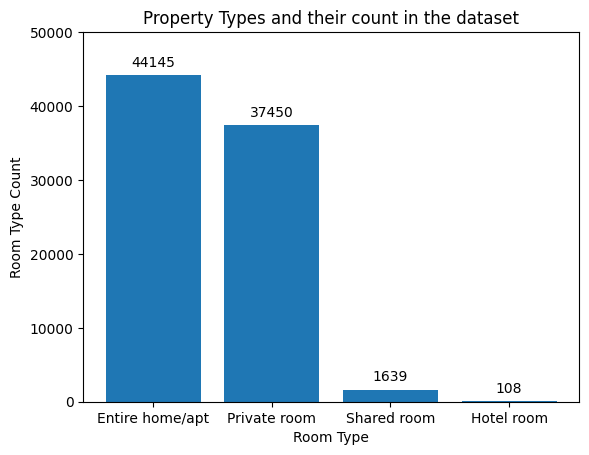

In [36]:
room_type_bar=plt.bar(property_types.index,property_types.loc[:,"count"]);
plt.bar_label(room_type_bar,labels=property_types.loc[:,"count"], padding=4);
plt.ylim([0,50000]);
plt.xlabel('Room Type');
plt.ylabel('Room Type Count');
plt.title('Property Types and their count in the dataset');
plt.show();

In [37]:
hood_group = df['neighbourhood group'].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Brooklyn,34613
Manhattan,34553
Queens,11094
Bronx,2266
Staten Island,816


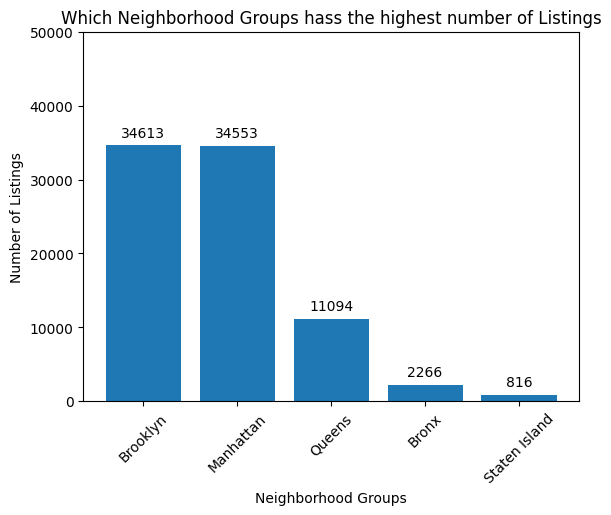

In [42]:
hood_group_type_bar=plt.bar(hood_group.index,hood_group.loc[:,"count"]);
plt.bar_label(hood_group_type_bar,labels=hood_group.loc[:,"count"], padding=4);
plt.ylim([0,50000]);
plt.xlabel('Neighborhood Groups');
plt.ylabel('Number of Listings');
plt.xticks(rotation=45);
plt.title('Which Neighborhood Groups hass the highest number of Listings');
plt.show();

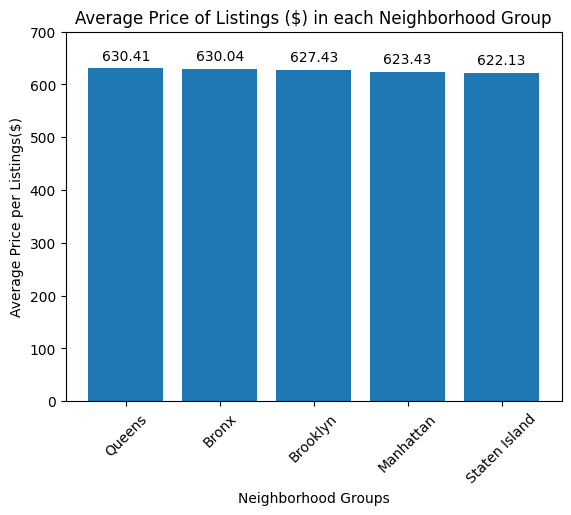

In [46]:
avg_price=df.groupby('neighbourhood group')['price_$'].mean().sort_values(ascending=False).to_frame()
avg_price_bar=plt.bar(avg_price.index,avg_price.loc[:,"price_$"]);
plt.bar_label(avg_price_bar, labels=round(avg_price.loc[:,"price_$"],2),label_type='edge', padding=4);
plt.ylim([0,700]);
plt.xlabel('Neighborhood Groups');
plt.ylabel('Average Price per Listings($)');
plt.xticks(rotation=45);
plt.title('Average Price of Listings ($) in each Neighborhood Group');
plt.show();

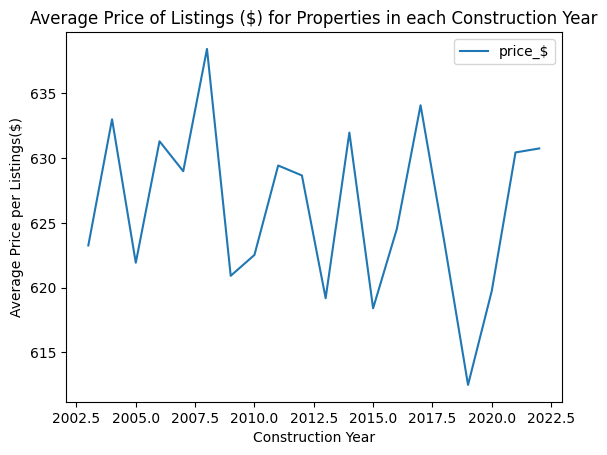

In [47]:
df.groupby(df['Construction year'])['price_$'].mean().to_frame().plot();
plt.xlabel('Construction Year');
plt.ylabel('Average Price per Listings($)');
plt.title('Average Price of Listings ($) for Properties in each Construction Year');
plt.show();

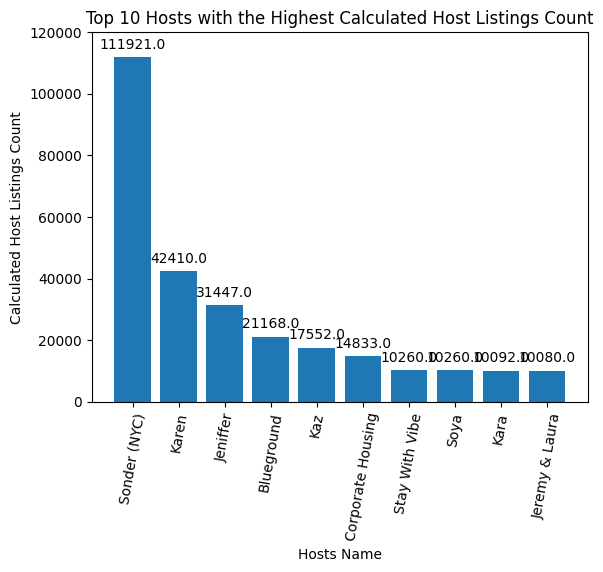

In [48]:
hosts=df.groupby('host name')['calculated host listings count'].sum().sort_values(ascending=False).nlargest(10).to_frame()
hosts_bar=plt.bar(hosts.index,hosts.loc[:,"calculated host listings count"]);
plt.bar_label(hosts_bar,labels=hosts.loc[:,"calculated host listings count"],label_type='edge', padding=4);
plt.xlabel('Hosts Name');
plt.ylabel('Calculated Host Listings Count');
plt.xticks(rotation=80);
plt.ylim([0,120000]);
plt.title('Top 10 Hosts with the Highest Calculated Host Listings Count');
plt.show();

In [49]:
review =df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending=False).to_frame()
review

,review rate number
host_identity_verified,
verified,3.284154
unconfirmed,3.273840


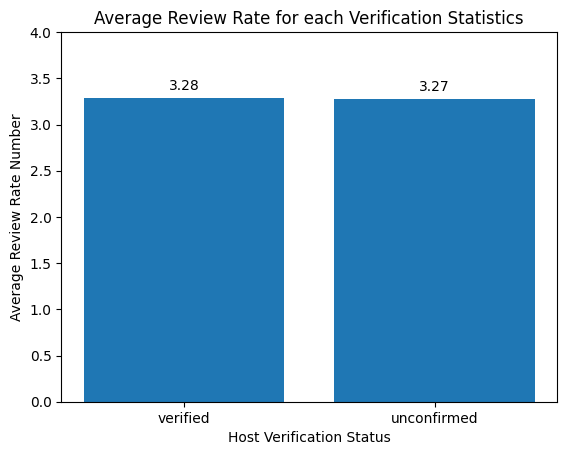

In [50]:
review_bar=plt.bar(review.index,review.loc[:,"review rate number"]);
plt.bar_label(review_bar,labels=round(review.loc[:,"review rate number"],2), padding=4);
plt.ylim([0,4]);
plt.xlabel('Host Verification Status');
plt.ylabel('Average Review Rate Number');
plt.title('Average Review Rate for each Verification Statistics');

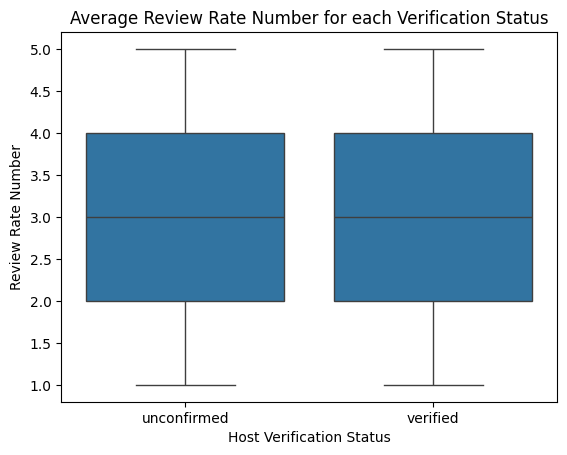

In [54]:
base_color=sns.color_palette()[0]
sns.boxplot(data=df,x="host_identity_verified",y="review rate number",color=base_color);
plt.xlabel('Host Verification Status');
plt.ylabel('Review Rate Number');
plt.title('Average Review Rate Number for each Verification Status');
plt.show();

In [55]:
df['price_$'].corr(df['service_fee_$'])

np.float64(0.9999909076249618)

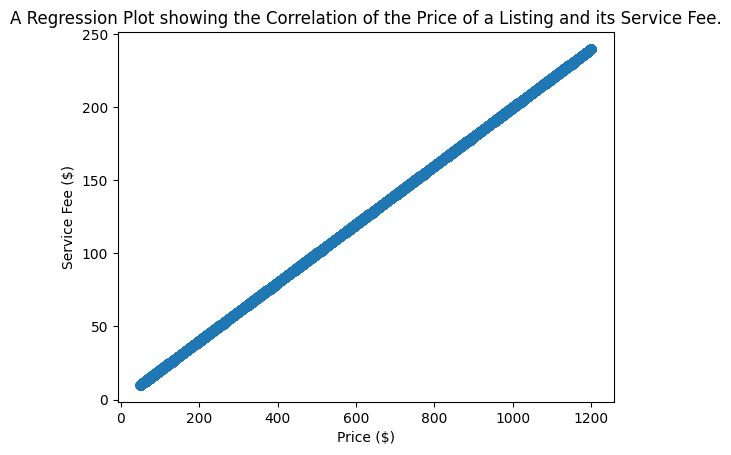

In [56]:
sns.regplot(df,x='price_$',y='service_fee_$');
plt.xlabel('Price ($)');
plt.ylabel('Service Fee ($)');
plt.title('A Regression Plot showing the Correlation of the Price of a Listing and its Service Fee.');
plt.show();

In [58]:
ARRN=df.groupby(['neighbourhood group','room type'])['review rate number'].mean().to_frame()
ARRN

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.382319
                    Private room               3.305810
                    Shared room                3.356322
Brooklyn            Entire home/apt            3.242363
                    Hotel room                 3.833333
                    Private room               3.275052
                    Shared room                3.312187
Manhattan           Entire home/apt            3.268779
                    Hotel room                 3.500000
                    Private room               3.285736
                    Shared room                3.262369
Queens              Entire home/apt            3.352477
                    Hotel room                 3.750000
                    Private room               3.313491
                    Shared room                3.318996
Staten Island       Entire home/apt            3.333333
                    Private room               3.497449
                    Shared room                3.714286

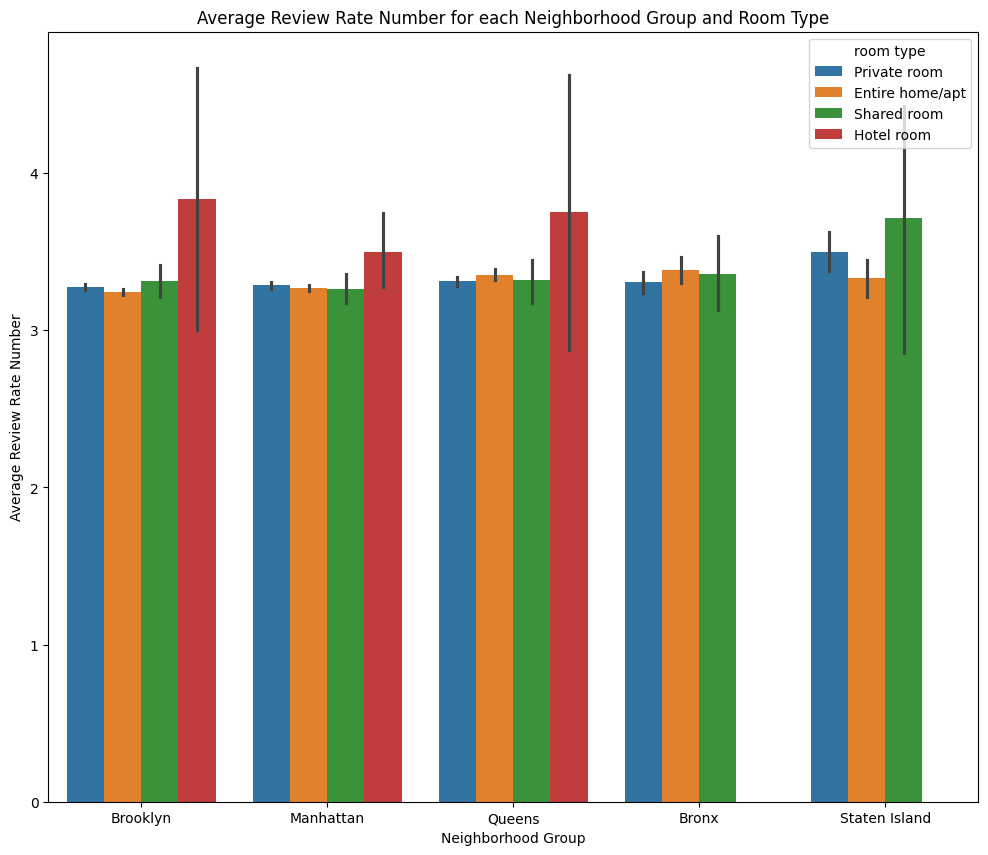

In [59]:
plt.figure(figsize=[12,10]);
sns.barplot(data=df, x='neighbourhood group', y='review rate number',hue='room type');
plt.xlabel('Neighborhood Group');
plt.ylabel('Average Review Rate Number');
plt.title('Average Review Rate Number for each Neighborhood Group and Room Type');
plt.show();

Text(0.5, 1.0, 'A Regression Plot showing the Correlation of the Calculated Host Listings Count and its Availability 365')

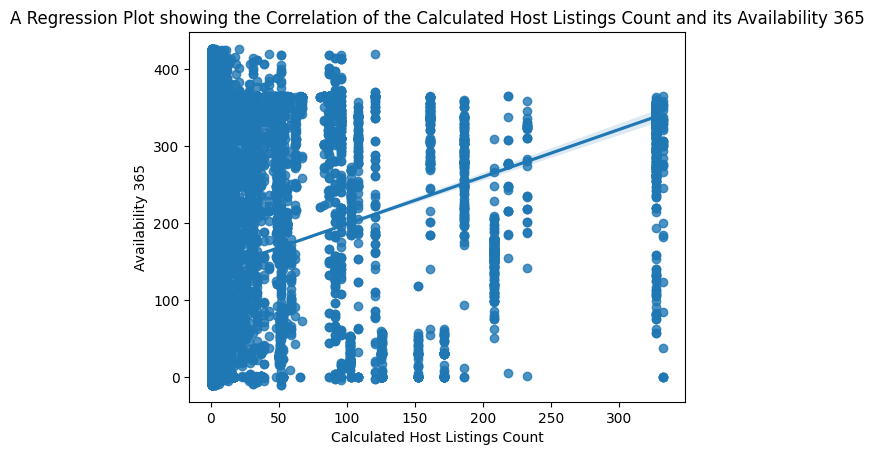

In [60]:
sns.regplot(df,x='calculated host listings count',y='availability 365');
plt.xlabel('Calculated Host Listings Count');
plt.ylabel('Availability 365');
plt.title('A Regression Plot showing the Correlation of the Calculated Host Listings Count and its Availability 365')

In [61]:
df['calculated host listings count'].corr(df['availability 365'])

np.float64(0.13606020789644355)